In [1]:
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

In [4]:
import xarray as xr

# Replace with the path to your .nc file
dataset_path = "./vp/vp_1980subset.nc"
ds = xr.open_dataset(dataset_path)
print(ds['vp'])


<xarray.DataArray 'vp' (time: 365, lat: 135, lon: 166)> Size: 33MB
[8179650 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB 42.82 42.83 42.84 42.85 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.32 -80.31 -80.3 ... -78.69 -78.68 -78.67
  * time     (time) datetime64[ns] 3kB 1980-01-01T12:00:00 ... 1980-12-30T12:...


In [5]:
ds_cleaned = ds.sel(time=ds['time'].dt.month.isin(range(4,10)))
print(ds_cleaned)

<xarray.Dataset> Size: 16MB
Dimensions:  (lat: 135, lon: 166, time: 183)
Coordinates:
  * lat      (lat) float64 1kB 42.82 42.83 42.84 42.85 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.32 -80.31 -80.3 ... -78.69 -78.68 -78.67
  * time     (time) datetime64[ns] 1kB 1980-04-01T12:00:00 ... 1980-09-30T12:...
Data variables:
    vp       (time, lat, lon) float32 16MB ...
Attributes:
    regrid_method:  bilinear


In [125]:
ds_tmax = xr.open_dataset("./tmax/tmax_1980subset.nc")
ds_vp_test = xr.open_dataset("./vp/vp_1980subset.nc")
#Reducing Dataset to just April to October
# print(tmax_cleaned['lon'])
# print(tmax_cleaned['lat'])
# print(tmax_cleaned['tmax'])
# print(tmax_cleaned)
# for lat in tmax_cleaned['lat'].values:
#   print(lat)

# for log in tmax_cleaned['lon'].values:
#   print(log)
# Loop through each time point in the dataset
# Assuming ds_tmax is your xarray Dataset and it has been cleaned to include data from April to September

# Assuming ds_tmax is your xarray Dataset and 'tmax' is the data variable of interest
ds_tmax = xr.open_dataset("./tmax/tmax_1980subset.nc")

#filtered to summer
# tmax_cleaned = ds_tmax.sel(time=ds['time'].dt.month.isin(range(4,10)))

# Use the .where() method to mask the dataset where 'tmax' values are greater than 25 degrees Celsius
# Then, use the .count() method to count the number of occurrences
# This function returns a lat and long map where all the values of T > 25 C
#Turns this into a 2d array by counting along the time dimension
# days_over_25 = tmax_cleaned.where(ds_tmax['tmax'] > 20, drop=True)['tmax'].count(dim='time')
# print(days_over_25['lat'])
# ds_cleaned = tmax_cleaned.sel(ds['lat'].slice(43, 44))
ds_long_lat = days_over_25.sel(lat=slice(43.5,43.9), lon=slice(-79.7, -79.1))
# print(ds_long_lat['lat'])
# print(ds_cleaned)
                              
# 'days_over_25' is now a DataArray with the count of days where tmax > 25°C for each latitude and longitude
# print(days_over_25)
# days_over_25.plot()
# plt.title('Max Temp Distribution')tmax_cleaned = ds_tmax.sel(time=ds['time'].dt.month.isin(range(4,10)))

# Use the .where() method to mask the dataset where 'tmax' values are greater than 25 degrees Celsius
# Then, use the .count() method to count the number of occurrences
# This function returns a lat and long map where all the values of T > 25 C
#Turns this into a 2d array by counting along the time dimension
days_over_25 = tmax_cleaned.where(ds_tmax['tmax'] > 20, drop=True)['tmax'].count(dim='time')
# print(days_over_25['lat'])
# ds_cleaned = tmax_cleaned.sel(ds['lat'].slice(43, 44))
ds_long_lat = days_over_25.sel(lat=slice(43.5,43.9), lon=slice(-79.7, -79.1))
print(ds_long_lat['lat'])
print(ds_long_lat['lon'])
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
ds_vp_test

<xarray.DataArray 'lat' (lat: 40)> Size: 320B
array([43.502021, 43.512021, 43.522021, 43.532021, 43.542021, 43.552021,
       43.562021, 43.572021, 43.582021, 43.592021, 43.602021, 43.612021,
       43.622021, 43.632021, 43.642021, 43.652021, 43.662021, 43.672021,
       43.682021, 43.692021, 43.702021, 43.712021, 43.722021, 43.732021,
       43.742021, 43.752021, 43.762021, 43.772021, 43.782021, 43.792021,
       43.802021, 43.812021, 43.822021, 43.832021, 43.842021, 43.852021,
       43.862021, 43.872021, 43.882021, 43.892021])
Coordinates:
  * lat      (lat) float64 320B 43.5 43.51 43.52 43.53 ... 43.87 43.88 43.89
Attributes:
    units:    degrees_north
<xarray.DataArray 'lon' (lon: 60)> Size: 480B
array([-79.698199, -79.688199, -79.678199, -79.668199, -79.658199, -79.648199,
       -79.638199, -79.628199, -79.618199, -79.608199, -79.598199, -79.588199,
       -79.578199, -79.568199, -79.558199, -79.548199, -79.538199, -79.528199,
       -79.518199, -79.508199, -79.498199, -79.4881

<xarray.Dataset> Size: 33MB
Dimensions:  (lat: 135, lon: 166, time: 365)
Coordinates:
  * lat      (lat) float64 1kB 42.82 42.83 42.84 42.85 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.32 -80.31 -80.3 ... -78.69 -78.68 -78.67
  * time     (time) datetime64[ns] 3kB 1980-01-01T12:00:00 ... 1980-12-30T12:...
Data variables:
    vp       (time, lat, lon) float32 33MB ...
Attributes:
    regrid_method:  bilinear

In [32]:
tmax_cleaned = ds_tmax.sel(time=ds['time'].dt.month.isin(range(4,10)))

# Use the .where() method to mask the dataset where 'tmax' values are greater than 25 degrees Celsius
# Then, use the .count() method to count the number of occurrences
# This function returns a lat and long map where all the values of T > 25 C
#Turns this into a 2d array by counting along the time dimension
days_over_25 = tmax_cleaned.where(ds_tmax['tmax'] > 20, drop=True)['tmax'].count(dim='time')
print(days_over_25['lat'])
# ds_cleaned = tmax_cleaned.sel(ds['lat'].slice(43, 44))
ds_long_lat = days_over_25.sel(lat=slice(43.5,43.9), lon=slice(-79.7, -79.1))
print(ds_long_lat['lat'])

days_over_25

<xarray.DataArray 'lat' (lat: 134)> Size: 1kB
array([42.832021, 42.842021, 42.852021, 42.862021, 42.872021, 42.882021,
       42.892021, 42.902021, 42.912021, 42.922021, 42.932021, 42.942021,
       42.952021, 42.962021, 42.972021, 42.982021, 42.992021, 43.002021,
       43.012021, 43.022021, 43.032021, 43.042021, 43.052021, 43.062021,
       43.072021, 43.082021, 43.092021, 43.102021, 43.112021, 43.122021,
       43.132021, 43.142021, 43.152021, 43.162021, 43.172021, 43.182021,
       43.192021, 43.202021, 43.212021, 43.222021, 43.232021, 43.242021,
       43.252021, 43.262021, 43.272021, 43.282021, 43.292021, 43.302021,
       43.312021, 43.322021, 43.332021, 43.342021, 43.352021, 43.362021,
       43.372021, 43.382021, 43.392021, 43.402021, 43.412021, 43.422021,
       43.432021, 43.442021, 43.452021, 43.462021, 43.472021, 43.482021,
       43.492021, 43.502021, 43.512021, 43.522021, 43.532021, 43.542021,
       43.552021, 43.562021, 43.572021, 43.582021, 43.592021, 43.602021,
     

<xarray.DataArray 'tmax' (lat: 134, lon: 165)> Size: 88kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 1kB 42.83 42.84 42.85 42.86 ... 44.14 44.15 44.16
  * lon      (lon) float64 1kB -80.31 -80.3 -80.29 ... -78.69 -78.68 -78.67

In [113]:
#Write algo to iterate over every single one
#Add feature 
import os

#Directory base path
d_path = './tmax'
start_year = 1981
end_year = 2010
# Store in the format {'year': Dataset}
dict_of_temp_values = {}

ds = xr.open_mfdataset("./tmax/tmax_*subset.nc")
dsvp = xr.open_mfdataset("./vp/vp_*subset.nc")
#Iterate through
for year in range(start_year, end_year + 1):
  #F string to concat into ospath
  # file_name = f"tmax_{year}subset.nc"
  # file_path = os.path.join(d_path, file_name)
    ds_max = ds.sel(time = (ds.time.dt.year == year))
    ds_vp_max = ds.sel(time = (ds.time.dt.year == year))
    # print(ds_max['time'])
    
    #Clean the dataset
    ds_cleaned = ds_max.sel(time=ds_max['time'].dt.month.isin(range(4,10)))
    ds_vp_cleaned = ds_vp_max.sel(time=ds_max['time'].dt.month.isin(range(4,10)))
    # print(ds_cleaned['time'])
    
    #Normalize to 2Dims then remove unwanted lat and long values
    ds_long_lat = ds_cleaned.sel(lat=slice(43.5,43.9), lon=slice(-79.7, -79.1))
    ds_long_lat = ds_vp_cleaned.sel(lat=slice(43.5,43.9), lon=slice(-79.7, -79.1))

    # print(ds_long_lat['tmax'])
    ds_cleaned_over_25 = ds_long_lat.where(ds_long_lat['tmax'] > 25).count(dim='time')['tmax'].values
    # print(ds_cleaned_over_25)
    # ds_cleaned_over_25 = ds_long_lat.where(ds_long_lat['tmax'] > 0, drop=True)['tmax'].count(dim='time')
    # print(ds_cleaned_over_25)

    # print(ds_cleaned_over_25)
    
    print(f"Processing {year}...")
    
    dict_of_temp_values[year] = ds_cleaned_over_25
      

# print(dict_of_temp_values)
# print(dsvp)

Processing 1981...
Processing 1982...
Processing 1983...
Processing 1984...
Processing 1985...
Processing 1986...
Processing 1987...
Processing 1988...
Processing 1989...
Processing 1990...
Processing 1991...
Processing 1992...
Processing 1993...
Processing 1994...
Processing 1995...
Processing 1996...
Processing 1997...
Processing 1998...
Processing 1999...
Processing 2000...
Processing 2001...
Processing 2002...
Processing 2003...
Processing 2004...
Processing 2005...
Processing 2006...
Processing 2007...
Processing 2008...
Processing 2009...
Processing 2010...


In [117]:
print(dict_of_temp_values)
print(dict_of_temp_values[2010])
print(dict_of_temp_values[1999])
print(dsvp['vp'])

{1981: array([[48, 48, 49, ..., 52, 53, 53],
       [48, 48, 48, ..., 53, 53, 53],
       [48, 48, 48, ..., 54, 54, 54],
       ...,
       [53, 53, 54, ..., 47, 47, 47],
       [54, 54, 52, ..., 46, 46, 47],
       [50, 51, 48, ..., 47, 45, 46]]), 1982: array([[39, 39, 39, ..., 42, 42, 42],
       [39, 39, 39, ..., 42, 42, 42],
       [39, 39, 39, ..., 42, 42, 42],
       ...,
       [43, 43, 45, ..., 39, 39, 39],
       [43, 43, 43, ..., 36, 38, 39],
       [42, 43, 42, ..., 36, 36, 38]]), 1983: array([[71, 71, 71, ..., 77, 77, 77],
       [72, 71, 71, ..., 77, 77, 77],
       [72, 72, 70, ..., 77, 77, 77],
       ...,
       [74, 74, 74, ..., 71, 71, 71],
       [73, 73, 73, ..., 71, 71, 71],
       [73, 73, 73, ..., 71, 71, 71]]), 1984: array([[53, 52, 53, ..., 56, 56, 56],
       [53, 52, 52, ..., 56, 56, 56],
       [53, 52, 52, ..., 56, 56, 56],
       ...,
       [54, 54, 54, ..., 47, 47, 48],
       [54, 54, 54, ..., 47, 47, 48],
       [54, 54, 54, ..., 47, 47, 47]]), 1985: a

In [72]:
# print(dict_of_temp_values[1990]['lat'])
# dict_of_temp_values[2005]

In [126]:
print(dict_of_temp_values)
# for year in dict_of_temp_values.values:
#   print(year)

{1981: array([[48, 48, 49, ..., 52, 53, 53],
       [48, 48, 48, ..., 53, 53, 53],
       [48, 48, 48, ..., 54, 54, 54],
       ...,
       [53, 53, 54, ..., 47, 47, 47],
       [54, 54, 52, ..., 46, 46, 47],
       [50, 51, 48, ..., 47, 45, 46]]), 1982: array([[39, 39, 39, ..., 42, 42, 42],
       [39, 39, 39, ..., 42, 42, 42],
       [39, 39, 39, ..., 42, 42, 42],
       ...,
       [43, 43, 45, ..., 39, 39, 39],
       [43, 43, 43, ..., 36, 38, 39],
       [42, 43, 42, ..., 36, 36, 38]]), 1983: array([[71, 71, 71, ..., 77, 77, 77],
       [72, 71, 71, ..., 77, 77, 77],
       [72, 72, 70, ..., 77, 77, 77],
       ...,
       [74, 74, 74, ..., 71, 71, 71],
       [73, 73, 73, ..., 71, 71, 71],
       [73, 73, 73, ..., 71, 71, 71]]), 1984: array([[53, 52, 53, ..., 56, 56, 56],
       [53, 52, 52, ..., 56, 56, 56],
       [53, 52, 52, ..., 56, 56, 56],
       ...,
       [54, 54, 54, ..., 47, 47, 48],
       [54, 54, 54, ..., 47, 47, 48],
       [54, 54, 54, ..., 47, 47, 47]]), 1985: a

In [9]:
print(ds_tmax.time[364])

<xarray.DataArray 'time' ()> Size: 8B
array('1980-12-30T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 1980-12-30T12:00:00


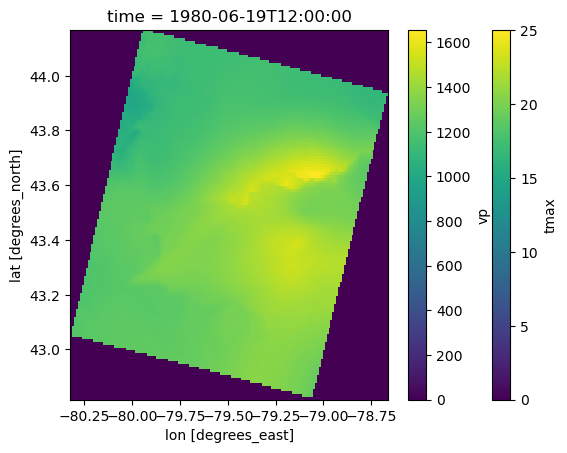

In [124]:
ds_tmax.isel(time = 170).tmax.plot()
ds_vp_test.isel(time = 170).vp.plot()

NameError: name 'toronto_map' is not defined

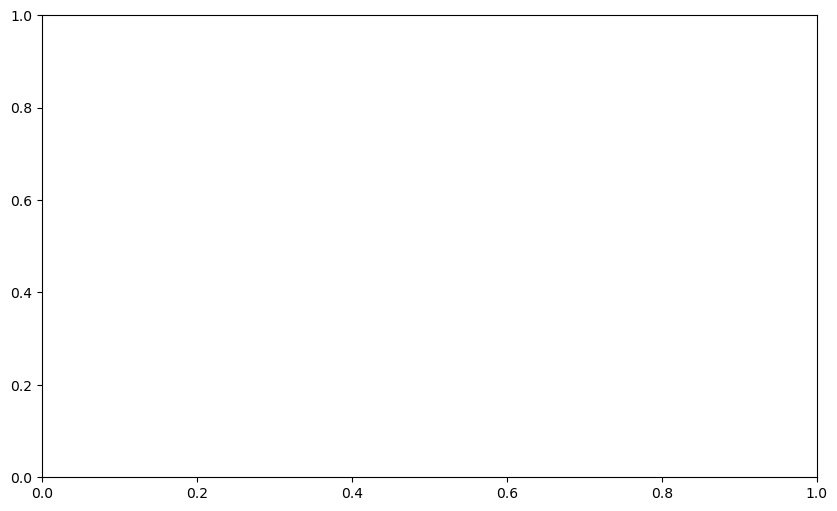

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your Toronto shapefile
toronto_map = gpd.read_file('path/to/toronto_shapefile.shp')

fig, ax = plt.subplots(figsize=(10, 6))
toronto_map.plot(ax=ax, edgecolor='black', facecolor='none')

# Overlay your data
# This assumes you've converted your data into a format compatible with matplotlib
# For complex data manipulations, consider rasterio to work with raster data and overlay it
# Plotting directly depends on your dataset's format and may require conversion or rasterization

ax.set_title('Toronto Map Overlay')
plt.show()
